<a href="https://colab.research.google.com/github/chinmayee95/Wifi-localisation/blob/master/MPRWifiRouters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%cd

/root


In [0]:
%cd /content/
%ls

/content
D_Test1.csv  D_Train1.csv  sample_data/  wifi_localization.txt


In [0]:
data = pd.read_csv("./wifi_localization.txt", names=["wifi_signal_1","wifi_signal_2","wifi_signal_3","wifi_signal_4","wifi_signal_5","wifi_signal_6","wifi_signal_7","room_number"], sep='\t')

In [0]:
data.head()

,wifi_signal_1,wifi_signal_2,wifi_signal_3,wifi_signal_4,wifi_signal_5,wifi_signal_6,wifi_signal_7,room_number
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   wifi_signal_1  2000 non-null   int64
 1   wifi_signal_2  2000 non-null   int64
 2   wifi_signal_3  2000 non-null   int64
 3   wifi_signal_4  2000 non-null   int64
 4   wifi_signal_5  2000 non-null   int64
 5   wifi_signal_6  2000 non-null   int64
 6   wifi_signal_7  2000 non-null   int64
 7   room_number    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [0]:
print('Data/Features with null values:\n', data.isnull().sum())

Data/Features with null values:
 wifi_signal_1    0
wifi_signal_2    0
wifi_signal_3    0
wifi_signal_4    0
wifi_signal_5    0
wifi_signal_6    0
wifi_signal_7    0
room_number      0
dtype: int64


In [0]:
data.describe(include = 'all')

,wifi_signal_1,wifi_signal_2,wifi_signal_3,wifi_signal_4,wifi_signal_5,wifi_signal_6,wifi_signal_7,room_number
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


Splitting the data into : Train, Validation and Test

In [0]:
x_data = data[["wifi_signal_1","wifi_signal_2","wifi_signal_3","wifi_signal_4","wifi_signal_5","wifi_signal_6","wifi_signal_7"]]
print(x_data)
x_label = data["room_number"]
print(x_label)
#20% of the total data
X_train, X_test, y_train, y_test = train_test_split(x_data, x_label, test_size=0.2, random_state=1)
#train data = 60% Validation set = 20%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

      wifi_signal_1  wifi_signal_2  ...  wifi_signal_6  wifi_signal_7
0               -64            -56  ...            -82            -81
1               -68            -57  ...            -85            -85
2               -63            -60  ...            -85            -84
3               -61            -60  ...            -90            -80
4               -63            -65  ...            -81            -87
...             ...            ...  ...            ...            ...
1995            -59            -59  ...            -86            -94
1996            -59            -56  ...            -87            -90
1997            -62            -59  ...            -87            -88
1998            -62            -58  ...            -90            -85
1999            -59            -50  ...            -88            -87

[2000 rows x 7 columns]
0       1
1       1
2       1
3       1
4       1
       ..
1995    4
1996    4
1997    4
1998    4
1999    4
Name: room_number, Length

In [0]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1200, 7)
(400, 7)
(400, 7)


Correaltion plot

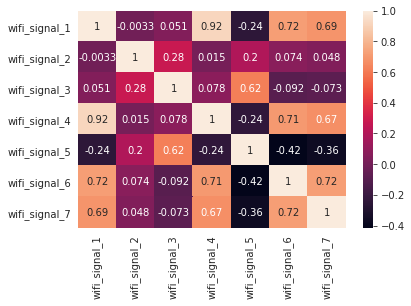

In [0]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
Index= ["wifi_signal_1","wifi_signal_2","wifi_signal_3","wifi_signal_4","wifi_signal_5","wifi_signal_6","wifi_signal_7"]
Cols = ["wifi_signal_1","wifi_signal_2","wifi_signal_3","wifi_signal_4","wifi_signal_5","wifi_signal_6","wifi_signal_7"]
df = DataFrame(abs(np.random.randn(7,7)), index=Index, columns=Cols)
corr = x_data.corr()
sns.heatmap(corr , annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faadd324748>,
      dtype=object)

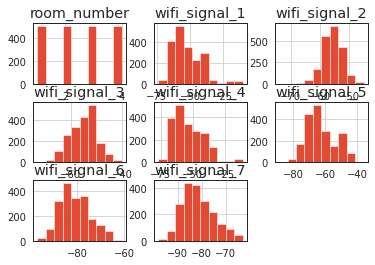

In [0]:
data.hist()

In [51]:
%cd "/content/"
!git clone https://github.com/chinmayee95/Wifi-localisation

/content
fatal: destination path 'Wifi-localisation' already exists and is not an empty directory.


In [52]:
!pwd
!ls Wifi-localisation/
%cd /content/Wifi-localisation/

/content
D_Test1.csv  D_Train1.csv  __pycache__	wifi_localization.txt
/content/Wifi-localisation


In [0]:
data = pd.read_csv("./D_Train1.csv", sep=',')

In [0]:
traindata = data[['WS1','WS2','WS3','WS4','WS5','WS6','WS7']]
trainlabel = data['Location']

In [55]:
data.shape
data.head()

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
0,1,-62,-55,-65,-59,-69,-86,-87
1,1,-61,-56,-65,-65,-66,-77,-81
2,1,-62,-58,-57,-65,-70,-82,-91
3,1,-59,-57,-60,-60,-63,-81,-77
4,1,-69,-58,-56,-61,-73,-81,-93


In [56]:
data.describe()

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,2.500000,-52.325000,-55.589375,-54.960000,-53.494375,-62.671250,-80.994375,-81.691250
std,1.118384,11.351317,3.420793,5.279993,11.519729,9.073223,6.508038,6.525434
min,1.000000,-74.000000,-74.000000,-73.000000,-77.000000,-86.000000,-97.000000,-98.000000
25%,1.750000,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-86.000000
50%,2.500000,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,3.250000,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,4.000000,-10.000000,-45.000000,-42.000000,-13.000000,-39.000000,-62.000000,-64.000000


In [57]:
data.isnull()

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1595,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False
1598,False,False,False,False,False,False,False,False


In [0]:
test = pd.read_csv("./D_Test1.csv", names=["wifi_signal_1","wifi_signal_2","wifi_signal_3","wifi_signal_4","wifi_signal_5","wifi_signal_6","wifi_signal_7","room_number"], sep=',')

In [0]:
testdata = data[['WS1','WS2','WS3','WS4','WS5','WS6','WS7']]
testlabel = data['Location']

Data without standaradisation and dimension reduction(original data)

In [60]:
%cd ..

/content


In [0]:
from classifier_models_py import classifier_models

In [62]:
trainlabel.shape

(1600,)

In [0]:
classifier_models(traindata,trainlabel)

Data with standardisation but no dimensionality reduction

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(traindata))
StandardScaler()
# print(scaler.mean_)
std_data = scaler.transform(traindata)
std_test_data = scaler.transform(testdata)
print('Data with 0 mean and unit variance:',std_data)

StandardScaler(copy=True, with_mean=True, with_std=True)
Data with 0 mean and unit variance: [[-0.85259045  0.17234578 -1.90211225 ... -0.69773758 -0.76938543
  -0.81380179]
 [-0.76446741 -0.12007548 -1.90211225 ... -0.36699095  0.61395209
   0.10596477]
 [-0.85259045 -0.704918   -0.38648496 ... -0.80798646 -0.15456875
  -1.42697951]
 ...
 [-0.50009827 -1.28976053  0.93968892 ...  1.39699108 -0.9230896
   0.56584806]
 [-0.85259045 -1.87460305  1.12914233 ...  1.72773771 -1.84531461
   0.2592592 ]
 [-0.32385219  0.46476704  1.50804915 ...  1.17649333 -0.46197709
  -1.42697951]]


In [0]:
classifier_models(std_data,trainlabel)

Data with standardisation and dimensionality reduction 

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(std_data)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, trainlabel], axis = 1)
PCA_df['Location'] = LabelEncoder().fit_transform(PCA_df['Location'])
PCA_df.describe()

,PC1,PC2,Location
count,1.600000e+03,1.600000e+03,1600.000000
mean,3.991252e-16,1.791622e-16,1.500000
std,1.844747e+00,1.306118e+00,1.118384
min,-3.641818e+00,-3.271388e+00,0.000000
25%,-1.402221e+00,-9.029259e-01,0.750000
50%,-3.223557e-01,-2.460136e-01,1.500000
75%,9.702657e-01,8.200771e-01,2.250000
max,5.338274e+00,4.144603e+00,3.000000


In [0]:
PCA_df

,PC1,PC2,Location
0,-1.058338,1.877326,0
1,-0.264497,1.807213,0
2,-1.371126,1.411374,0
3,-0.137745,0.998133,0
4,-1.497436,1.513074,0
...,...,...,...
1595,-2.364903,-0.413139,3
1596,-1.630271,-0.902838,3
1597,-1.173237,-0.629335,3
1598,-2.234424,-0.497094,3


In [0]:
classifier_models(X_pca,trainlabel)

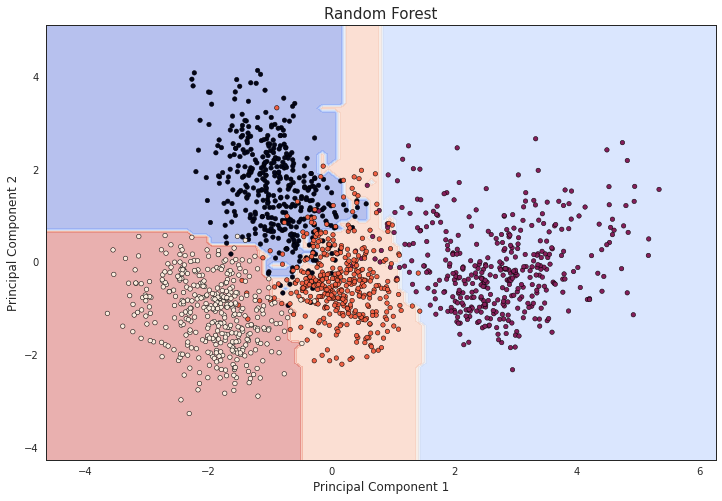

In [0]:
from itertools import product

# X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, 
#                                                                         test_size = 0.30, 
#                                                                         random_state = 101)
X_Reduced = X_pca
Y_Reduced = trainlabel
X_Test_Reduced = pca.transform(std_test_data)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,trainlabel)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = Z
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

In [0]:
y_pred.shape

(10450,)

In [0]:
from sklearn.metrics import accuracy_score
y_true = trainlabel
y_pred = trainedforest.predict(X_pca)
# ,trainlabel)
print(accuracy_score(y_true, y_pred))

y_true = testlabel
y_pred = trainedforest.predict(X_Test_Reduced)
# ,trainlabel)
print(accuracy_score(y_true, y_pred))


1.0
1.0
